Problem statement- <br>

Project planning-
Predicting the salaray of the employee based on the Job title, location, company etc.

Data collection-
We now need to look at those aeas/platforms from which we can get the data ex- Linkedin, Glassdoor etc.

We can use web scrapping to scrap the data from the website and then use the modelling 




# Data Collection using web scrapping

In [1]:
# web scarpping

from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd


In [2]:
#import pandas as pd
#path = "C:/Users/dpriyareddypothul/Desktop/Divya/E2E/chromedriver"



#df= get_jobs('data_scientist',15,False,path,15)



In [3]:
def get_jobs(keyword, num_jobs, verbose, path, slp_time):
    
    '''Gathers jobs as a dataframe, scraped from Glassdoor'''
    
    #Initializing the webdriver
    options = webdriver.ChromeOptions()
    
    #Uncomment the line below if you'd like to scrape without a new Chrome window every time.
    #options.add_argument('headless')
    
    #Change the path to where chromedriver is in your home folder.
    driver = webdriver.Chrome(executable_path=path, options=options)
    driver.set_window_size(1120, 1000)
    
    url = "https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword="+keyword+"&sc.keyword="+keyword+"&locT=&locId=&jobType="
    #url = 'https://www.glassdoor.com/Job/jobs.htm?sc.keyword="' + keyword + '"&locT=C&locId=1147401&locKeyword=San%20Francisco,%20CA&jobType=all&fromAge=-1&minSalary=0&includeNoSalaryJobs=true&radius=100&cityId=-1&minRating=0.0&industryId=-1&sgocId=-1&seniorityType=all&companyId=-1&employerSizes=0&applicationType=0&remoteWorkType=0'
    driver.get(url)
    jobs = []

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(slp_time)

        #Test for the "Sign Up" prompt and get rid of it.
        try:
            driver.find_element_by_class_name("selected").click()
        except ElementClickInterceptedException:
            pass

        time.sleep(.1)

        try:
            driver.find_element_by_css_selector('[alt="Close"]').click() #clicking to the X.
            print(' x out worked')
        except NoSuchElementException:
            print(' x out failed')
            pass

        
        #Going through each job in this page
        job_buttons = driver.find_elements_by_class_name("jl")  #jl for Job Listing. These are the buttons we're going to click.
        for job_button in job_buttons:  

            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            if len(jobs) >= num_jobs:
                break

            job_button.click()  #You might 
            time.sleep(1)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
                    location = driver.find_element_by_xpath('.//div[@class="location"]').text
                    job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
                    job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True
                except:
                    time.sleep(5)

            try:
                salary_estimate = driver.find_element_by_xpath('.//span[@class="gray salary"]').text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
            
            try:
                rating = driver.find_element_by_xpath('.//span[@class="rating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            try:
                driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="overview"]').click()

                try:
                    #<div class="infoEntity">
                    #    <label>Headquarters</label>
                    #    <span class="value">San Francisco, CA</span>
                    #</div>
                    headquarters = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Headquarters"]//following-sibling::*').text
                except NoSuchElementException:
                    headquarters = -1

                try:
                    size = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
                except NoSuchElementException:
                    size = -1

                try:
                    founded = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Founded"]//following-sibling::*').text
                except NoSuchElementException:
                    founded = -1

                try:
                    type_of_ownership = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Type"]//following-sibling::*').text
                except NoSuchElementException:
                    type_of_ownership = -1

                try:
                    industry = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
                except NoSuchElementException:
                    industry = -1

                try:
                    sector = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Sector"]//following-sibling::*').text
                except NoSuchElementException:
                    sector = -1

                try:
                    revenue = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Revenue"]//following-sibling::*').text
                except NoSuchElementException:
                    revenue = -1

                try:
                    competitors = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Competitors"]//following-sibling::*').text
                except NoSuchElementException:
                    competitors = -1

            except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
                headquarters = -1
                size = -1
                founded = -1
                type_of_ownership = -1
                industry = -1
                sector = -1
                revenue = -1
                competitors = -1

                
            if verbose:
                print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,
            "Competitors" : competitors})
            #add job to jobs
            
            
        #Clicking on the "next page" button
        try:
            driver.find_element_by_xpath('.//li[@class="next"]//a').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

    return pd.DataFrame(jobs)  

# Step 1: Reading Understanding and visualizing the data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',10000)

In [5]:
df = pd.read_csv('glassdoor_jobs.csv')
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer"
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen..."
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1
5,Data Scientist,$77K-$92K (Glassdoor Est.),Job Title: Data Scientists\n\nJob Description\...,2.2,Great-Circle Technologies\n2.2,"Chantilly, VA","Chantilly, VA",1 to 50 employees,2000,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹100 to ₹500 million (INR),-1
6,Senior Data Engineer,$77K-$92K (Glassdoor Est.),"Senior Data Engineer\nLocation/City: Atlanta, ...",3.6,Steady\n3.6,"Atlanta, GA","Atlanta, GA",1 to 50 employees,2017,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1
7,Data Scientist,$77K-$92K (Glassdoor Est.),Are you performance-driven and want your impac...,4.0,goTRG\n4.0,"Miami, FL","Miami, FL",501 to 1000 employees,2008,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹10 to ₹50 billion (INR),-1
8,"Associate Director, Data Science",$77K-$92K (Glassdoor Est.),About Veracyte\n\n\nVeracyte (Nasdaq: VCYT) is...,3.5,Veracyte\n3.5,"South San Francisco, CA","South San Francisco, CA",201 to 500 employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹10 to ₹50 billion (INR),-1
9,Senior Data Scientist,$77K-$92K (Glassdoor Est.),Brinks Home Security™ is a proven leader in th...,3.4,Brinks Home Security\n3.4,"Dallas, TX","Farmers Branch, TX",1001 to 5000 employees,-1,Company - Public,Security Services,Business Services,Unknown / Non-Applicable,"ADT Security Services, Protection 1"


In [6]:
df= df[df['Salary Estimate'] !='-1']

In [7]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [8]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1


# Data Cleaning

In [9]:
df['Salary Estimate'].apply(lambda x:x.split('('))
# split will split the data at '(' into a list hence we save only the 
# first part of the salary range into the salary estimate

0              [$77K-$92K , Glassdoor Est.)]
1              [$77K-$92K , Glassdoor Est.)]
2              [$77K-$92K , Glassdoor Est.)]
3              [$77K-$92K , Glassdoor Est.)]
4              [$77K-$92K , Glassdoor Est.)]
5              [$77K-$92K , Glassdoor Est.)]
6              [$77K-$92K , Glassdoor Est.)]
7              [$77K-$92K , Glassdoor Est.)]
8              [$77K-$92K , Glassdoor Est.)]
9              [$77K-$92K , Glassdoor Est.)]
10             [$77K-$92K , Glassdoor Est.)]
11             [$77K-$92K , Glassdoor Est.)]
12             [$77K-$92K , Glassdoor Est.)]
13             [$77K-$92K , Glassdoor Est.)]
14             [$77K-$92K , Glassdoor Est.)]
15             [$77K-$92K , Glassdoor Est.)]
16             [$77K-$92K , Glassdoor Est.)]
17             [$77K-$92K , Glassdoor Est.)]
18             [$77K-$92K , Glassdoor Est.)]
19             [$77K-$92K , Glassdoor Est.)]
20             [$77K-$92K , Glassdoor Est.)]
21             [$77K-$92K , Glassdoor Est.)]
22        

In [10]:
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [11]:
remove_kd = salary.apply(lambda x:x.replace('K','').replace('$',''))

In [12]:
remove_kdp = remove_kd.apply(lambda x:x.replace('Per Hour',''))
remove_kdp

0        77-92 
1        77-92 
2        77-92 
3        77-92 
4        77-92 
5        77-92 
6        77-92 
7        77-92 
8        77-92 
9        77-92 
10       77-92 
11       77-92 
12       77-92 
13       77-92 
14       77-92 
15       77-92 
16       77-92 
17       77-92 
18       77-92 
19       77-92 
20       77-92 
21       77-92 
22       77-92 
23       77-92 
24       77-92 
25       77-92 
26       77-92 
27       77-92 
28       77-92 
29       77-92 
30     108-140 
31     108-140 
32     108-140 
33     108-140 
34     108-140 
35     108-140 
36     108-140 
37     108-140 
38     108-140 
39     108-140 
40     108-140 
41     108-140 
42     108-140 
43     108-140 
44     108-140 
45     108-140 
46     108-140 
47     108-140 
48     108-140 
49     108-140 
50     108-140 
51     108-140 
52     108-140 
53     108-140 
54     108-140 
55     108-140 
56     108-140 
57     108-140 
58     108-140 
59     108-140 
60      17- 23 
61      17- 23 
62      

In [13]:
df['min_salary'] = remove_kdp.apply(lambda x: x.split('-')[0])
df['max_salary'] = remove_kdp.apply(lambda x: x.split('-')[1])

df['min_salary'] = pd.to_numeric(df['min_salary'])
df['max_salary'] = pd.to_numeric(df['max_salary'])

df['avg_salary'] = (df.min_salary + df.max_salary)/2
#df.head(5)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",77,92,84.5
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1,77,92,84.5
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),"Novartis, Baxter, Pfizer",77,92,84.5
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,Healthcare Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Enlivant, Sunrise Senior Living, Brookdale Sen...",77,92,84.5
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,Government Agencies,Government,Unknown / Non-Applicable,-1,77,92,84.5
5,Data Scientist,$77K-$92K (Glassdoor Est.),Job Title: Data Scientists\n\nJob Description\...,2.2,Great-Circle Technologies\n2.2,"Chantilly, VA","Chantilly, VA",1 to 50 employees,2000,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹100 to ₹500 million (INR),-1,77,92,84.5
6,Senior Data Engineer,$77K-$92K (Glassdoor Est.),"Senior Data Engineer\nLocation/City: Atlanta, ...",3.6,Steady\n3.6,"Atlanta, GA","Atlanta, GA",1 to 50 employees,2017,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,77,92,84.5
7,Data Scientist,$77K-$92K (Glassdoor Est.),Are you performance-driven and want your impac...,4.0,goTRG\n4.0,"Miami, FL","Miami, FL",501 to 1000 employees,2008,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹10 to ₹50 billion (INR),-1,77,92,84.5
8,"Associate Director, Data Science",$77K-$92K (Glassdoor Est.),About Veracyte\n\n\nVeracyte (Nasdaq: VCYT) is...,3.5,Veracyte\n3.5,"South San Francisco, CA","South San Francisco, CA",201 to 500 employees,2008,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹10 to ₹50 billion (INR),-1,77,92,84.5
9,Senior Data Scientist,$77K-$92K (Glassdoor Est.),Brinks Home Security™ is a proven leader in th...,3.4,Brinks Home Security\n3.4,"Dallas, TX","Farmers Branch, TX",1001 to 5000 employees,-1,Company - Public,Security Services,Business Services,Unknown / Non-Applicable,"ADT Security Services, Protection 1",77,92,84.5


In [14]:
# Company name has numbers in name. Hence, removng numbers from name
df['Company Name'].apply(lambda x: x.split('\n')[0])


0                                     Affinity Solutions
1                                                ManTech
2                                                 Takeda
3                                        A Place for Mom
4                                                GovTech
5                              Great-Circle Technologies
6                                                 Steady
7                                                  goTRG
8                                               Veracyte
9                                   Brinks Home Security
10                               Apellis Pharmaceuticals
11                                                Avlino
12                                                  Mars
13                                                 GEICO
14                Central California Alliance for Health
15                                        Analysis Group
16                                         Wuxi Nextcode
17                             

In [15]:
df['Company_txt'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

In [16]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,Company_txt
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",77,92,84.5,Affinity Solutions
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1,77,92,84.5,ManTech


In [17]:
df['Job_state'] = df['Location'].apply(lambda x:x.split(', ')[-1])
df.Job_state.value_counts()

CA               218
MA                92
VA                88
NY                78
TX                48
WA                45
IL                41
MD                34
PA                31
CO                27
DC                26
NC                24
OH                21
GA                18
WI                17
MO                17
NJ                15
FL                15
TN                14
Remote            12
AL                12
MI                11
CT                 9
UT                 9
MN                 9
NE                 8
IN                 6
AZ                 5
OR                 5
OK                 4
IA                 4
RI                 4
KS                 3
Virginia           3
United States      3
ID                 3
New Jersey         2
KY                 2
SC                 2
MS                 2
HI                 2
Raleigh            1
ME                 1
NH                 1
WV                 1
Oregon             1
NM                 1
LA           

In [18]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,Company_txt,Job_state
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",77,92,84.5,Affinity Solutions,NY
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,₹100 to ₹500 billion (INR),-1,77,92,84.5,ManTech,VA


In [19]:
# headquarters and location in same then 1 else 0

df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis=1)

# calculating the age of the company
df['company_age'] = df['Founded'].apply(lambda x: x if x<1 else 2020-x)

df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,Company_txt,Job_state,same_state,company_age
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",77,92,84.5,Affinity Solutions,NY,1,22
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,Business Services,₹100 to ₹500 billion (INR),-1,77,92,84.5,ManTech,VA,0,52


In [20]:
# checking the job description field
df['Job Description']

0      Data Scientist\nAffinity Solutions / Marketing...
1      Secure our Nation, Ignite your Future\n\nSumma...
2      By clicking the Apply button, I understand tha...
3      Join Our Growing Team\nA career with A Place f...
4      We are looking for Data Scientists who are int...
5      Job Title: Data Scientists\n\nJob Description\...
6      Senior Data Engineer\nLocation/City: Atlanta, ...
7      Are you performance-driven and want your impac...
8      About Veracyte\n\n\nVeracyte (Nasdaq: VCYT) is...
9      Brinks Home Security™ is a proven leader in th...
10     Position Summary:\n\nThe Quality Control Scien...
11     Job Description\n\n\nAvlino Inc. is seeking ex...
12     JOB CATEGORY:\n\nInformation Services\n\nREQUI...
13     GEICO’s Data Science team uses predictive anal...
14     We have an opportunity to join the Alliance as...
15     Overview\n\n\nData Scientist\n\nLocations US-M...
16     WuXi NextCODE is seeking a motivated Scientist...
17     Lendio is looking to fil

In [21]:
# if python, R, spark is there or not in job description skills

df['python_yn'] = df['Job Description'].apply(lambda x:1 if 'python' in x.lower() else 0)
df['R_yn'] = df['Job Description'].apply(lambda x:1 if 'r studio' in x.lower() else 0)
df['spark_yn'] = df['Job Description'].apply(lambda x:1 if 'spark' in x.lower() else 0)
df['aws_yn'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['excel_yn'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 1)


print(df['python_yn'].value_counts())
print(df['R_yn'].value_counts())
print(df['spark_yn'].value_counts())
print(df['aws_yn'].value_counts())
print(df['excel_yn'].value_counts())

1    662
0    338
Name: python_yn, dtype: int64
0    997
1      3
Name: R_yn, dtype: int64
0    762
1    238
Name: spark_yn, dtype: int64
0    761
1    239
Name: aws_yn, dtype: int64
1    1000
Name: excel_yn, dtype: int64


In [22]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company_txt,Job_state,same_state,company_age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,84.5,Affinity Solutions,NY,1,22,1,0,0,0,1
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,84.5,ManTech,VA,0,52,0,0,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1000 non-null   object 
 1   Salary Estimate    1000 non-null   object 
 2   Job Description    1000 non-null   object 
 3   Rating             1000 non-null   float64
 4   Company Name       1000 non-null   object 
 5   Location           1000 non-null   object 
 6   Headquarters       1000 non-null   object 
 7   Size               1000 non-null   object 
 8   Founded            1000 non-null   int64  
 9   Type of ownership  1000 non-null   object 
 10  Industry           1000 non-null   object 
 11  Sector             1000 non-null   object 
 12  Revenue            1000 non-null   object 
 13  Competitors        1000 non-null   object 
 14  min_salary         1000 non-null   int64  
 15  max_salary         1000 non-null   int64  
 16  avg_salary         1000 n

In [24]:
def title_simplifier(x):
    if 'data scientist' in x.lower():
        return 'data scientist'
    elif 'data engineer' in x.lower():
        return 'data engineer'
    elif 'analyst' in x.lower():
        return 'analyst'
    elif 'machine learning' in x.lower():
        return 'mle'
    elif 'manager' in x.lower():
        return 'manager'
    elif 'director' in x.lower():
        return 'director'
    else:
        return 'na'

def seniority(x):
    if 'sr' in x.lower() or 'senior' in x.lower() or 'sr' in x.lower() or 'lead' in x.lower() or 'principal' in x.lower():
        return 'senior'
    elif 'jr' in x.lower() or 'jr.' in x.lower():
        return 'jr'
    else:
        return 'na'


In [25]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Company_txt,Job_state,same_state,company_age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions,NY,1,22,1,0,0,0,1,data scientist
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,ManTech,VA,0,52,0,0,0,0,1,data scientist


In [26]:
df.job_simp.value_counts()

data scientist    627
na                175
data engineer      85
analyst            73
mle                16
director           12
manager            12
Name: job_simp, dtype: int64

In [27]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        847
senior    152
jr          1
Name: seniority, dtype: int64

In [28]:
df.Job_state.value_counts()

CA               218
MA                92
VA                88
NY                78
TX                48
WA                45
IL                41
MD                34
PA                31
CO                27
DC                26
NC                24
OH                21
GA                18
WI                17
MO                17
NJ                15
FL                15
TN                14
Remote            12
AL                12
MI                11
CT                 9
UT                 9
MN                 9
NE                 8
IN                 6
AZ                 5
OR                 5
OK                 4
IA                 4
RI                 4
KS                 3
Virginia           3
United States      3
ID                 3
New Jersey         2
KY                 2
SC                 2
MS                 2
HI                 2
Raleigh            1
ME                 1
NH                 1
WV                 1
Oregon             1
NM                 1
LA           

In [29]:
# fix state New Jersey
df['Job_state'] = df.Job_state.apply(lambda x:x.strip() if x!='New Jersey' else 'NJ')
df['Job_state'] = df.Job_state.apply(lambda x:x.strip() if x!='Oregon' else 'OR')
df['Job_state'] = df.Job_state.apply(lambda x:x.strip() if x!='Virginia' else 'VA')
df['Job_state'] = df.Job_state.apply(lambda x:x.strip() if x!='Raleigh' else 'NC')
df['Job_state'] = df.Job_state.apply(lambda x:x.strip() if x!='United States' else 'DC') 
df.Job_state.value_counts()


CA        218
MA         92
VA         91
NY         78
TX         48
WA         45
IL         41
MD         34
PA         31
DC         29
CO         27
NC         25
OH         21
GA         18
MO         17
WI         17
NJ         17
FL         15
TN         14
AL         12
Remote     12
MI         11
MN          9
UT          9
CT          9
NE          8
IN          6
OR          6
AZ          5
RI          4
IA          4
OK          4
ID          3
KS          3
MS          2
HI          2
KY          2
SC          2
NV          1
AR          1
LA          1
ND          1
WV          1
NM          1
NH          1
DE          1
ME          1
Name: Job_state, dtype: int64

In [30]:
# JOB DESCRIPTION LENGTH
df['desc_len'] = df['Job Description'].apply(lambda x:len(x))
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,company_age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,22,1,0,0,0,1,data scientist,na,2728
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,52,0,0,0,0,1,data scientist,na,3490


In [31]:
# competitor count
df['num_comp'] =  df['Competitors'].apply(lambda x:len(x.split(',')) if x!='-1' else 0)
df['num_comp']

0      3
1      0
2      3
3      3
4      0
5      0
6      0
7      0
8      0
9      2
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     3
23     0
24     0
25     0
26     2
27     0
28     0
29     3
30     3
31     3
32     3
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     2
41     0
42     0
43     0
44     3
45     0
46     0
47     0
48     3
49     2
50     0
51     3
52     2
53     2
54     0
55     3
56     3
57     0
58     0
59     0
60     3
61     2
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     3
73     2
74     3
75     3
76     0
77     0
78     3
79     0
80     3
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     3
89     0
90     2
91     3
92     0
93     3
94     0
95     0
96     0
97     0
98     0
99     0
100    3
101    0
102    0
103    0
104    0
105    0
106    3
107    2
108    0
109    0
110    0
1

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'Company_txt', 'Job_state',
       'same_state', 'company_age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [37]:
df.Company_txt

0                                     Affinity Solutions
1                                                ManTech
2                                                 Takeda
3                                        A Place for Mom
4                                                GovTech
5                              Great-Circle Technologies
6                                                 Steady
7                                                  goTRG
8                                               Veracyte
9                                   Brinks Home Security
10                               Apellis Pharmaceuticals
11                                                Avlino
12                                                  Mars
13                                                 GEICO
14                Central California Alliance for Health
15                                        Analysis Group
16                                         Wuxi Nextcode
17                             

In [38]:
df_out = df.copy()
df_out.to_csv('salary_data_cleaned.csv',index=False)

# EDA

In [39]:
df_out.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,na,2728,3
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,52,0,0,0,0,1,data scientist,na,3490,0
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,...,239,1,0,1,0,1,data scientist,na,3915,3
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,...,20,1,0,0,1,1,data scientist,na,5230,3
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,...,4,1,0,0,0,1,data scientist,na,2905,0


In [40]:
df_out.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'Company_txt', 'Job_state',
       'same_state', 'company_age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [41]:
df_out.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,same_state,company_age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,3.581300,1650.801000,83.040000,120.600000,101.820000,0.424000,31.525000,0.662000,0.003000,0.238000,0.239000,1.0,3573.130000,0.813000
std,1.323818,741.158672,26.101718,34.633213,29.383516,0.494438,44.513355,0.473265,0.054717,0.426072,0.426686,0.0,1802.620357,1.270293
min,-1.000000,-1.000000,17.000000,23.000000,20.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.0,132.000000,0.000000
25%,3.400000,1920.750000,68.000000,101.000000,89.500000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.0,2403.750000,0.000000
50%,3.800000,1995.000000,83.000000,121.000000,99.500000,0.000000,17.000000,1.000000,0.000000,0.000000,0.000000,1.0,3352.500000,0.000000
75%,4.300000,2008.000000,105.000000,138.000000,121.500000,1.000000,34.000000,1.000000,0.000000,0.000000,0.000000,1.0,4486.000000,2.000000
max,5.000000,2019.000000,139.000000,229.000000,184.000000,1.000000,330.000000,1.000000,1.000000,1.000000,1.000000,1.0,18555.000000,3.000000


<AxesSubplot:>

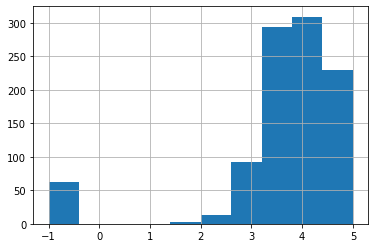

In [46]:
df_out.Rating.hist()

In [43]:
# this is pretty close to normal distribution

<AxesSubplot:>

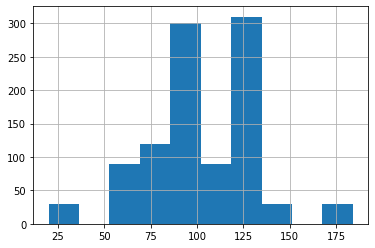

In [47]:
df_out.avg_salary.hist()

<AxesSubplot:>

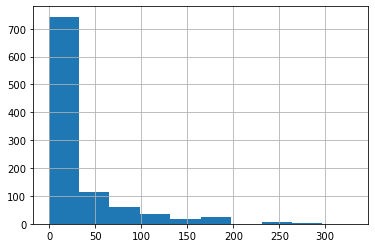

In [49]:
df_out.company_age.hist()

<AxesSubplot:>

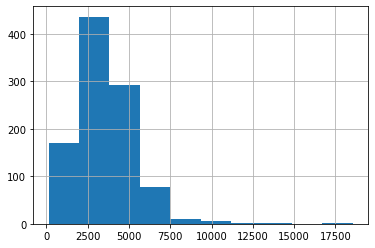

In [51]:
df_out.desc_len.hist()

<AxesSubplot:>

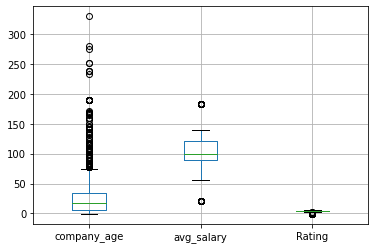

In [53]:
df_out.boxplot(column=['company_age','avg_salary','Rating'])

In [62]:
df[['company_age','avg_salary','Rating','desc_len','num_comp']].corr()

,company_age,avg_salary,Rating,desc_len,num_comp
company_age,1.000000,0.034152,0.082409,0.325370,0.267775
avg_salary,0.034152,1.000000,-0.037977,-0.018130,0.027685
Rating,0.082409,-0.037977,1.000000,0.094440,0.111314
desc_len,0.325370,-0.018130,0.094440,1.000000,0.220116
num_comp,0.267775,0.027685,0.111314,0.220116,1.000000


<AxesSubplot:>

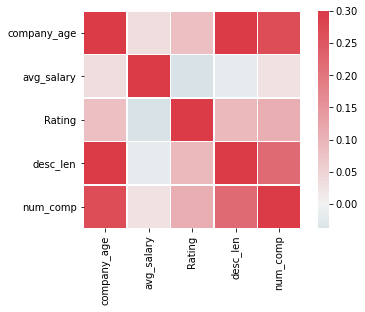

In [61]:
#age and rating are highly correlated.
#age and desc_len are also corelated
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['company_age','avg_salary','Rating','desc_len','num_comp']].corr(),
           vmax=.3, center=0,cmap=cmap, square=True, linewidths=.5)

In [60]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'Company_txt', 'Job_state',
       'same_state', 'company_age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [63]:
df_cat= df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Company_txt', 'Job_state',
       'same_state','spark_yn', 'aws_yn',
       'excel_yn','seniority']]

grapgh for Location: total=30


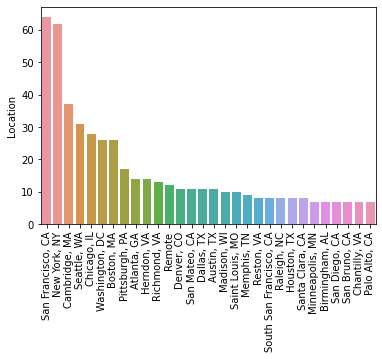

grapgh for Headquarters: total=30


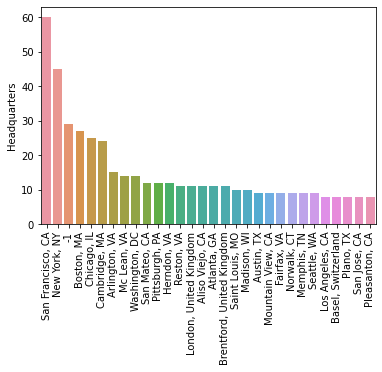

grapgh for Size: total=9


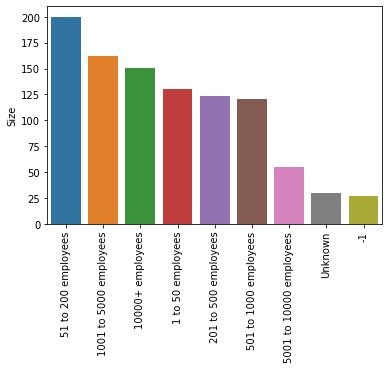

grapgh for Type of ownership: total=12


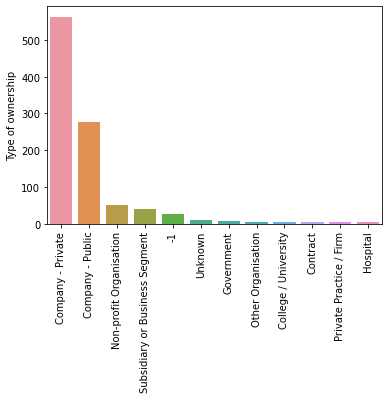

grapgh for Industry: total=30


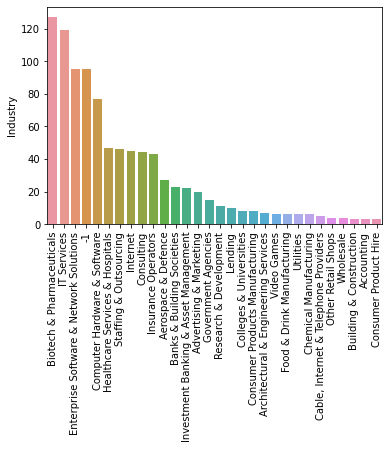

grapgh for Sector: total=24


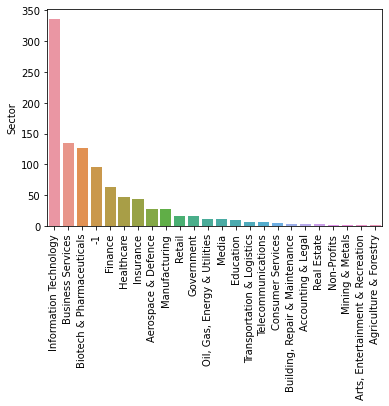

grapgh for Revenue: total=13


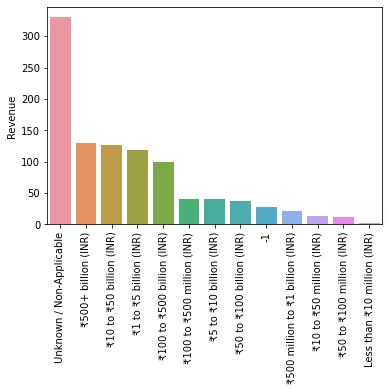

grapgh for Company_txt: total=30


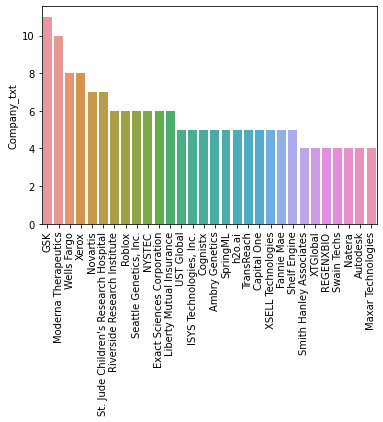

grapgh for Job_state: total=30


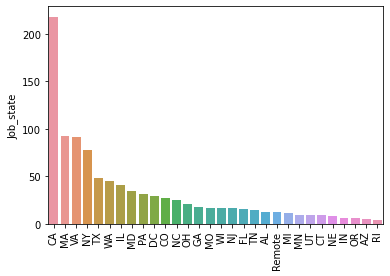

grapgh for same_state: total=2


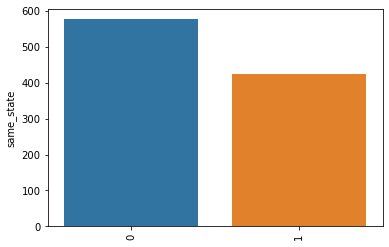

grapgh for spark_yn: total=2


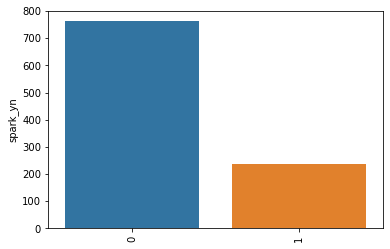

grapgh for aws_yn: total=2


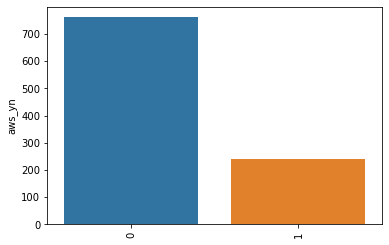

grapgh for excel_yn: total=1


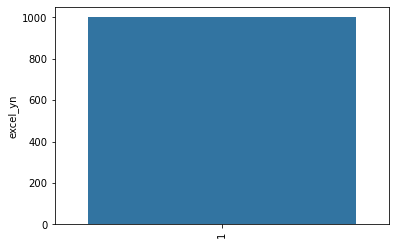

grapgh for seniority: total=3


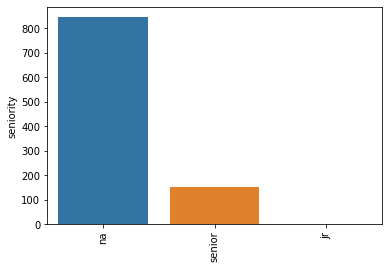

In [74]:
for i in df_cat.columns:
    cat_num= df_cat[i].value_counts()[:30]
    print("grapgh for %s: total=%d" %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [75]:
#most companies are in 51 to 200 range and second highest in 1k-5k range
# private companyes are most common asking for the positions.
# Biotech and pharma are highest and second next is IT services.
# CA has highest job count compared to others


In [77]:
pd.pivot_table(df_out, index='job_simp',values='avg_salary')

,avg_salary
job_simp,
analyst,99.376712
data engineer,98.823529
data scientist,103.628389
director,97.083333
manager,99.375000
mle,110.906250
na,97.477143


In [78]:
# we can analyst has highest salary and followed by data engineer and data scientist

In [79]:
pd.pivot_table(df_out, index=['job_simp','seniority'],values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr         109.000000
               na          99.267857
               senior      99.156250
data engineer  na         100.383333
               senior      95.080000
data scientist na         103.901739
               senior     100.605769
director       na         102.100000
               senior      72.000000
manager        na          96.888889
               senior     106.833333
mle            na         104.136364
               senior     125.800000
na             na         100.261905
               senior      90.316327

In [86]:
# understanding the average salary of each jobs in different state
pd.pivot_table(df_out,index=['Job_state','job_simp'],values='avg_salary')

avg_salary
Job_state job_simp                  
AL        analyst          56.500000
          data scientist  118.150000
          na               92.000000
AR        data scientist   89.500000
AZ        data scientist  102.875000
          na              100.500000
CA        analyst         114.535714
          data engineer    98.100000
          data scientist   99.940559
          director         88.250000
          manager         116.500000
          mle             141.312500
          na               98.787879
CO        analyst         102.375000
          data engineer    93.250000
          data scientist  101.281250
          director         96.500000
          na              127.125000
CT        analyst          20.000000
          data scientist   83.250000
          na              111.000000
DC        analyst          75.500000
          data engineer    80.000000
          data scientist  104.291667
DE        data scientist   68.500000
FL        data engineer    99.500000
          data scientist  102.954545
          na               96.166667
GA        data engineer    89.500000
          data scientist  112.633333
          na              184.000000
HI        data scientist  100.000000
IA        analyst          89.500000
          data engineer   111.000000
          director         89.500000
          na               96.500000
ID        data scientist  109.750000
          na              130.500000
IL        data engineer   104.916667
          data scientist   98.362069
          na               91.500000
IN        data engineer    68.500000
          data scientist  100.333333
          na              120.500000
KS        analyst         140.500000
          data scientist   84.500000
          manager         140.500000
KY        data scientist   96.750000
LA        analyst          57.000000
MA        analyst          93.250000
          data engineer    91.050000
          data scientist  111.313953
          director        102.500000
          manager          93.500000
          na               87.578125
MD        data scientist  102.846154
          na               83.937500
ME        analyst          20.000000
MI        data engineer   108.000000
          data scientist  101.833333
          manager          99.500000
          na               68.500000
MN        data engineer   104.250000
          data scientist  124.416667
          na              111.000000
MO        analyst         108.600000
          data engineer   102.000000
          data scientist  103.000000
          na               72.500000
MS        na               90.750000
NC        data engineer   100.875000
          data scientist  112.000000
          director         72.250000
          manager         130.000000
          mle              20.000000
          na               57.000000
ND        na              111.000000
NE        analyst         111.000000
          data scientist  112.642857
NH        data scientist   68.500000
NJ        analyst         112.500000
          data scientist   89.750000
          na              106.700000
NM        data scientist  124.000000
NV        analyst         124.000000
NY        analyst         126.700000
          data engineer    87.666667
          data scientist  102.548077
          director        124.000000
          manager          74.500000
          mle              80.000000
          na              113.625000
OH        analyst         124.500000
          data scientist   96.250000
          mle              20.000000
          na              112.375000
OK        analyst          75.500000
          data scientist   94.500000
          na               83.750000
OR        data scientist   90.200000
          mle              92.000000
PA        analyst         106.833333
          data engineer   107.500000
          data scientist  107.236842
          mle             184.000000
          na              111.500000
RI        analyst          93.

In [87]:
pd.pivot_table(df_out,index=['Job_state','job_simp'],values='avg_salary',aggfunc='count')

avg_salary
Job_state job_simp                  
AL        analyst                  1
          data scientist          10
          na                       1
AR        data scientist           1
AZ        data scientist           4
          na                       1
CA        analyst                 14
          data engineer           15
          data scientist         143
          director                 2
          manager                  3
          mle                      8
          na                      33
CO        analyst                  4
          data engineer            2
          data scientist          16
          director                 1
          na                       4
CT        analyst                  1
          data scientist           6
          na                       2
DC        analyst                  3
          data engineer            2
          data scientist          24
DE        data scientist           1
FL        data engineer            1
          data scientist          11
          na                       3
GA        data engineer            2
          data scientist          15
          na                       1
HI        data scientist           2
IA        analyst                  1
          data engineer            1
          director                 1
          na                       1
ID        data scientist           2
          na                       1
IL        data engineer            6
          data scientist          29
          na                       6
IN        data engineer            1
          data scientist           3
          na                       2
KS        analyst                  1
          data scientist           1
          manager                  1
KY        data scientist           2
LA        analyst                  1
MA        analyst                  2
          data engineer           10
          data scientist          43
          director                 4
          manager                  1
          na                      32
MD        data scientist          26
          na                       8
ME        analyst                  1
MI        data engineer            2
          data scientist           6
          manager                  2
          na                       1
MN        data engineer            2
          data scientist           6
          na                       1
MO        analyst                  5
          data engineer            2
          data scientist           8
          na                       2
MS        na                       2
NC        data engineer            4
          data scientist          15
          director                 2
          manager                  1
          mle                      1
          na                       2
ND        na                       1
NE        analyst                  1
          data scientist           7
NH        data scientist           1
NJ        analyst                  2
          data scientist          10
          na                       5
NM        data scientist           1
NV        analyst                  1
NY        analyst                 10
          data engineer            3
          data scientist          52
          director                 1
          manager                  3
          mle                      1
          na                       8
OH        analyst                  2
          data scientist          10
          mle                      1
          na                       8
OK        analyst                  1
          data scientist           1
          na                       2
OR        data scientist           5
          mle                      1
PA        analyst                  6
          data engineer            2
          data scientist          19
          mle                      1
          na                       3
RI        analyst             

In [92]:
#finding the highesh data scientist salary is in which state
pd.pivot_table(df[df.job_simp == 'data scientist'],index='Job_state',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
Job_state,
MN,124.416667
WV,124.000000
NM,124.000000
AL,118.150000
Remote,115.562500
NE,112.642857
GA,112.633333
NC,112.000000
MA,111.313953


In [93]:
df_out.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'Company_txt', 'Job_state',
       'same_state', 'company_age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [98]:
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue','python_yn', 'R_yn', 'spark_yn', 'aws_yn','excel_yn','num_comp','Type of ownership','avg_salary']]

In [101]:
for i in df_pivots:
    print(i)
    print(pd.pivot_table(df_pivots, index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
 2.6    114.666667
 3.0    110.977273
 4.3    108.500000
 3.8    107.967742
-1.0    107.669355
 3.4    106.925926
 4.7    106.777778
 3.3    106.000000
 4.9    105.700000
 4.4    104.382353
 5.0    103.443548
 2.3    103.333333
 2.9    103.000000
 4.0    102.877049
 3.9    102.226562
 3.6    102.057377
 3.5    100.565217
 2.1    100.500000
 4.6    100.279412
 2.8     99.181818
 4.1     98.415254
 2.7     98.200000
 3.2     97.500000
 3.7     95.862069
 4.2     95.500000
 4.8     92.343750
 2.2     92.000000
 1.9     91.000000
 4.5     89.152778
 3.1     87.307692
 2.0     84.500000
 2.5     56.666667
 1.5     56.500000
 2.4     20.000000
Industry
                                           avg_salary
Industry                                             
Home Furniture and Houseware Shops         140.500000
Telecommunications Services                140.500000
Venture Capital & Private Equity           127.500000
Grocery Shops & Supermarkets  

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [102]:
# companies which are looking for python skills.
pd.pivot_table(df_pivots,index='Revenue',columns='python_yn',values='avg_salary',aggfunc='count')

python_yn,0,1
Revenue,,
-1,8,19
Less than ₹10 million (INR),1,2
Unknown / Non-Applicable,84,246
₹1 to ₹5 billion (INR),38,80
₹10 to ₹50 billion (INR),58,68
₹10 to ₹50 million (INR),2,11
₹100 to ₹500 billion (INR),39,61
₹100 to ₹500 million (INR),19,22
₹5 to ₹10 billion (INR),13,27
